In [ ]:
import tensorflow as tf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
from tensorflow.keras.layers import Conv1D,MaxPool1D,Dropout,BatchNormalization,Flatten,Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets,metrics

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
md=df.isnull()
for col in df.columns.tolist():
  print(col)
  print(md[col].value_counts())
  print()

Time
False    284807
Name: Time, dtype: int64

V1
False    284807
Name: V1, dtype: int64

V2
False    284807
Name: V2, dtype: int64

V3
False    284807
Name: V3, dtype: int64

V4
False    284807
Name: V4, dtype: int64

V5
False    284807
Name: V5, dtype: int64

V6
False    284807
Name: V6, dtype: int64

V7
False    284807
Name: V7, dtype: int64

V8
False    284807
Name: V8, dtype: int64

V9
False    284807
Name: V9, dtype: int64

V10
False    284807
Name: V10, dtype: int64

V11
False    284807
Name: V11, dtype: int64

V12
False    284807
Name: V12, dtype: int64

V13
False    284807
Name: V13, dtype: int64

V14
False    284807
Name: V14, dtype: int64

V15
False    284807
Name: V15, dtype: int64

V16
False    284807
Name: V16, dtype: int64

V17
False    284807
Name: V17, dtype: int64

V18
False    284807
Name: V18, dtype: int64

V19
False    284807
Name: V19, dtype: int64

V20
False    284807
Name: V20, dtype: int64

V21
False    284807
Name: V21, dtype: int64

V22
False    284807
Name: 

In [ ]:
fraud=df[df['Class']==1]
non_fraud=df[df['Class']==0]
print(fraud.shape,non_fraud.shape)

(492, 31) (284315, 31)


In [ ]:
non_fraud=non_fraud.sample(fraud.shape[0])
print(fraud.shape,non_fraud.shape)

(492, 31) (492, 31)


In [ ]:
new_df=fraud.append(non_fraud,ignore_index=True)

In [ ]:
x=new_df.drop(['Class'],axis=1)
y=new_df['Class']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [ ]:
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_test.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
model=Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=(x_train[0].shape)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.25))
model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
25/25 [==============================] - 0s 14ms/step - loss: 0.5049 - accuracy: 0.7764 - val_loss: 0.5167 - val_accuracy: 0.8680
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 0.3117 - accuracy: 0.8882 - val_loss: 0.4927 - val_accuracy: 0.9391
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2790 - accuracy: 0.9136 - val_loss: 0.4600 - val_accuracy: 0.9340
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2319 - accuracy: 0.9161 - val_loss: 0.4353 - val_accuracy: 0.9086
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2414 - accuracy: 0.9174 - val_loss: 0.4074 - val_accuracy: 0.8832
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2224 - accuracy: 0.9149 - val_loss: 0.3497 - val_accuracy: 0.9239
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2246 - accuracy: 0.9314 - val_loss: 0.3192 - val_accuracy: 0.9239
Epoch 8/50
25/25 [=

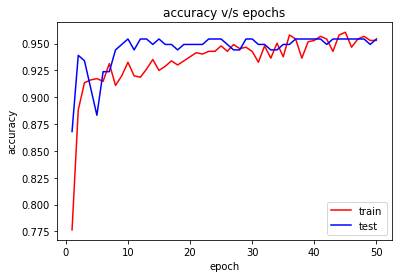

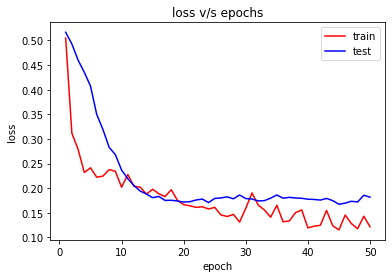

In [ ]:
plt.plot(range(1,51),history.history['accuracy'],color='red')
plt.plot(range(1,51),history.history['val_accuracy'],color='blue')
plt.title("accuracy v/s epochs")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train','test'])
plt.show()
plt.plot(range(1,51),history.history['loss'],color='red')
plt.plot(range(1,51),history.history['val_loss'],color='blue')
plt.title("loss v/s epochs")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train','test'])
plt.show()